<a href="https://colab.research.google.com/github/monisha-2006-bit/monisha/blob/main/Big_Mart_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

#importing the required libraries for the Analysis of the project.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading of data

In [ ]:
train = pd.read_csv('/content/Train.csv')

In [ ]:
test = pd.read_csv('/content/Test.csv')

In [ ]:
train.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set.

(8523, 12)

In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
train.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
train.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [ ]:
train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
test.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set.

(5681, 11)

In [ ]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [ ]:
test.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
test.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5676,False
5677,False
5678,False
5679,False


In [ ]:
test.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007         NaN               Tier 2   
2                          1998         NaN               Tier 3   
3                          2007         NaN               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]>

In [ ]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test['Item_Type'].value_counts()

,count
Item_Type,
Snack Foods,789
Fruits and Vegetables,781
Household,638
Frozen Foods,570
Dairy,454
Baking Goods,438
Canned,435
Health and Hygiene,338
Meat,311


In [ ]:
test['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


Data processing and content

In [ ]:

train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
train['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [ ]:
train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
test['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [ ]:
test['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [ ]:
test['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3668
Regular,2013


explaratory data analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

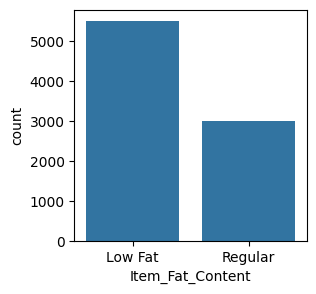

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='Item_Fat_Content',data=train)
plt.xlabel('Item_Fat_Content')
plt.show()
# A countplot is a type of data visualization used in python.

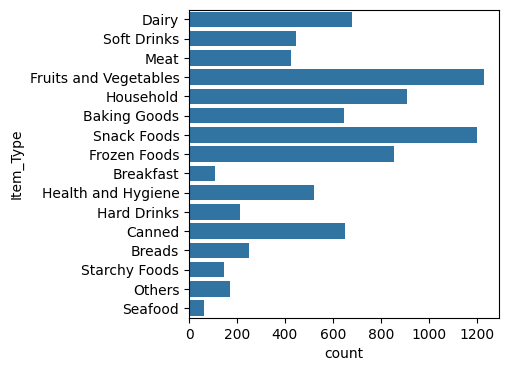

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(y='Item_Type',data=train)
plt.ylabel('Item_Type')
plt.show()

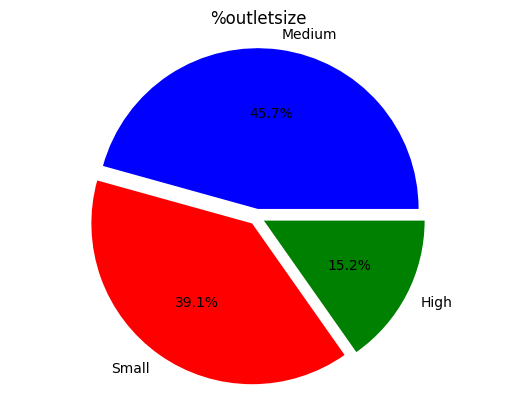

In [ ]:
outletsize=train['Outlet_Size'].value_counts(normalize=True)*100
explode=(0.05,0.05,0.05)
colors=('blue','red','green')
plt.pie(outletsize,labels=outletsize.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('%outletsize')
plt.axis('equal')
plt.show()

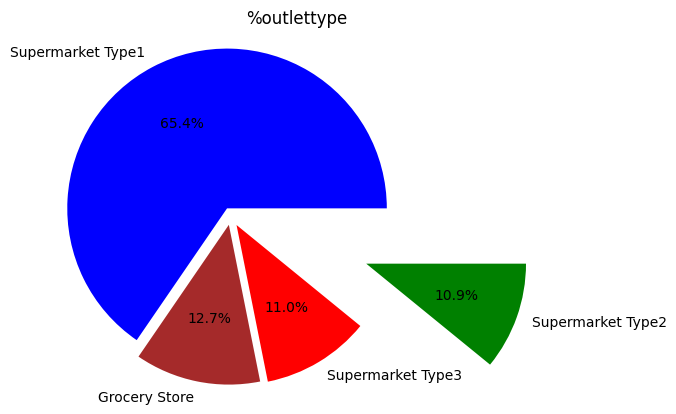

In [ ]:
outlettype=train['Outlet_Type'].value_counts(normalize=True)*100
explode=(0.05,0.06,0.07,0.9)
colors=('blue','brown','red','green')
plt.pie(outlettype,labels=outlettype.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('%outlettype')
plt.axis('equal')
plt.show()

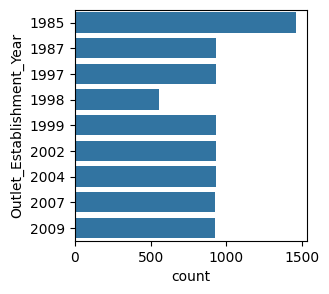

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(y='Outlet_Establishment_Year',data=train)
plt.ylabel('Outlet_Establishment_Year')
plt.show()

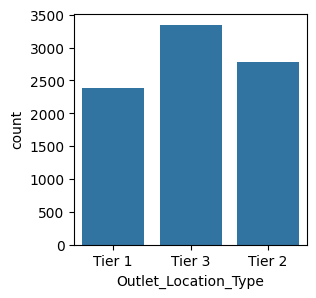

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Location_Type',data=train)
plt.xlabel('Outlet_Location_Type')
plt.show()

To handle the Missing and catagorical values

In [ ]:
# To handle the Missing and null values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
for col in train.columns:
    if train[col].dtype=='object':
        train[col]=le.fit_transform(train[col])

In [ ]:
train['Outlet_Size'].dtypes
#display the data type of 'Outlet_Size' column

dtype('int64')

In [ ]:
train.head()
#display updated few rows of the datasets

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
imputer=SimpleImputer(strategy='mean')
missing_coloums=['Item_Weight','Outlet_Size']
train[missing_coloums]=imputer.fit_transform(train[missing_coloums])

In [ ]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
le=LabelEncoder()
for col in test.columns:
  if test[col].dtype=='object':
    test[col]=le.fit_transform(test[col])

In [ ]:
test['Outlet_Size'].dtypes
#display the data type of 'Outlet_Size' column

dtype('int64')

In [ ]:
test.head()
#display updated few rows of the datasets

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,3,1,1
4,1184,NaN,1,0.118599,4,234.2300,5,1985,1,2,3


In [ ]:
imputer=SimpleImputer(strategy='mean')
missing_coloums=['Item_Weight','Outlet_Size']
test[missing_coloums]=imputer.fit_transform(test[missing_coloums])

In [ ]:
# create SimpleImputer object for mean imputation in the TRAIN SET
imputer = SimpleImputer(strategy='mean')

In [ ]:
# select columns with missing values
cols_with_missing = ["Item_Weight", 'Outlet_Size']

In [ ]:
# impute missing values in selected columns
train[cols_with_missing] = imputer.fit_transform(train[cols_with_missing])

In [ ]:
test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


#handling the outliers

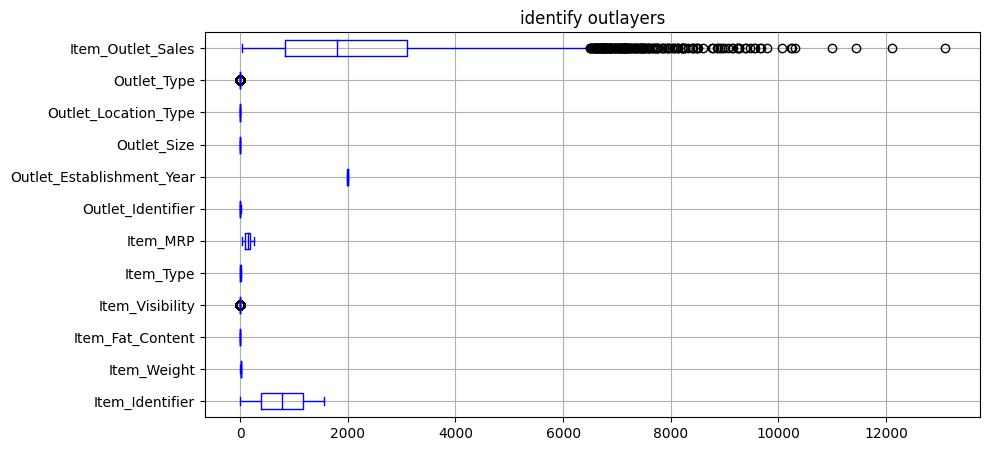

In [ ]:
number_coloumns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_coloumns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outlayers')
plt.show()

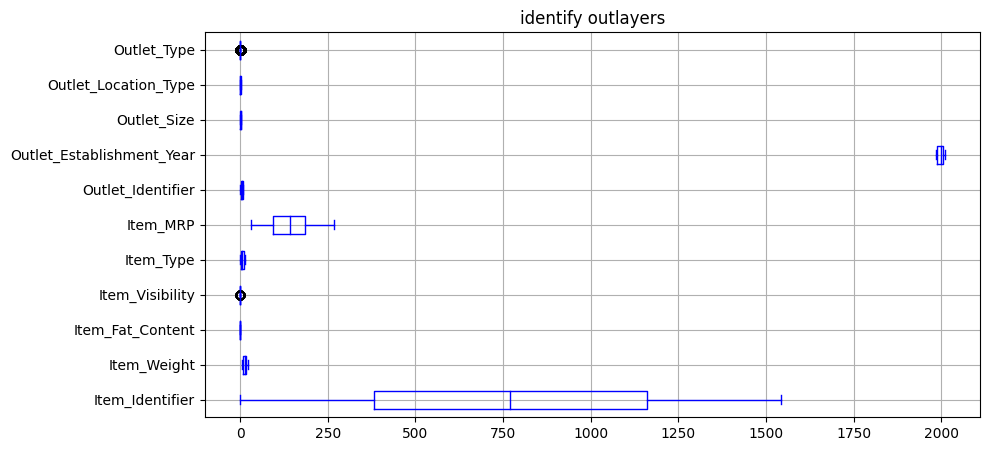

In [ ]:
number_coloumns=test.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_coloumns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outlayers')
plt.show()

In [ ]:
q1=np.percentile(train['Item_Outlet_Sales'],25)
q3=np.percentile(train['Item_Outlet_Sales'],75)
iqr=q3-q1
print('q1',q1)
print('q3',q3)
print('IQR',iqr)

q1 834.2474
q3 3101.2964
IQR 2267.049


In [ ]:
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
print('upperlimit',upperlimit)
print('lowerlimit',lowerlimit)

upperlimit 6501.8699
lowerlimit -2566.3261


#Cube transformation

In [ ]:
train['Outlet_Sales_Square']=np.cbrt(train['Item_Outlet_Sales'])

In [ ]:
train['Outlet_Sales_Cube']=np.cbrt(train['Item_Outlet_Sales'])

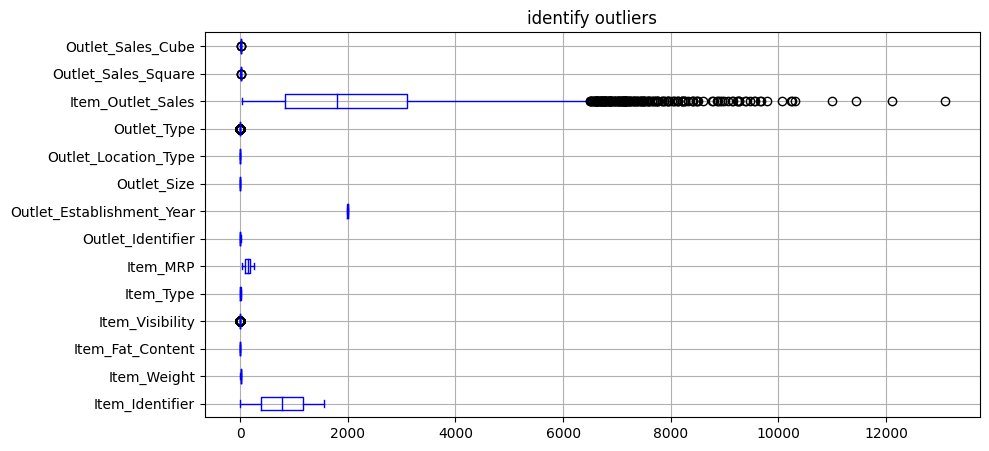

In [ ]:
number_columns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outliers')
plt.show()

#Bi variate Analysis

<ipython-input-96-2c7d3778c2e2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Item_Outlet_Sales'],kde=True ,rug=True)


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

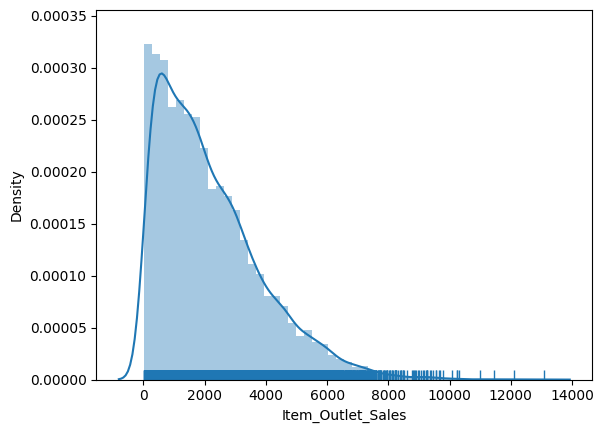

In [ ]:
sns.distplot(a=train['Item_Outlet_Sales'],kde=True ,rug=True)

<ipython-input-97-ca45caa581af>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Outlet_Sales_Cube'],kde=True ,rug=True)


<Axes: xlabel='Outlet_Sales_Cube', ylabel='Density'>

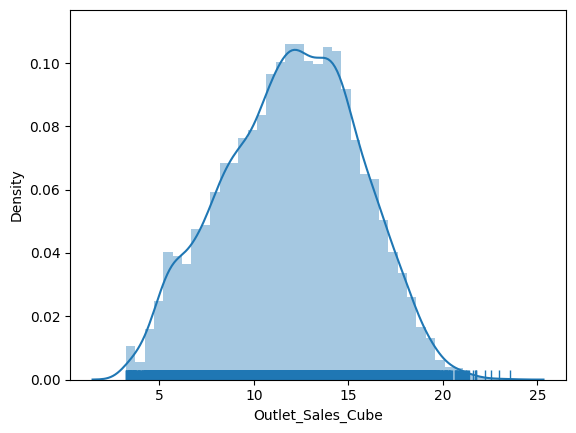

In [ ]:
sns.distplot(a=train['Outlet_Sales_Cube'],kde=True ,rug=True)

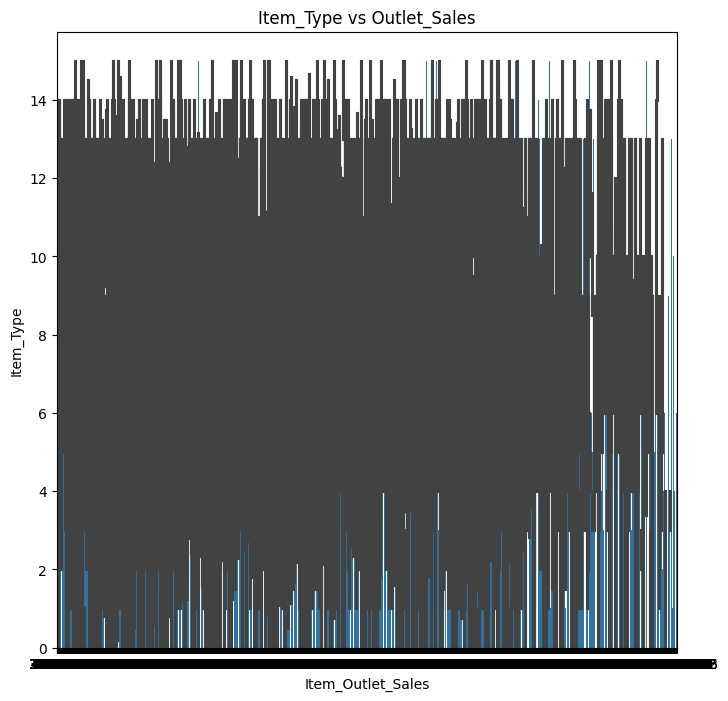

In [ ]:
# Set the size of the figure
plt.figure(figsize=(8,8))

# Create a bar plot with 'Item_Outlet_Sales' on the x-axis and 'Item_Type' on the y-axis
sns.barplot(x='Item_Outlet_Sales', y='Item_Type', data=train).set(title='Item_Type vs Outlet_Sales')

# Set the labels for the x and y axes
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_Type')

# Display the plot
plt.show()

feature Engineering

In [ ]:
# Display the first five rows of the 'train' DataFrame
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Square,Outlet_Sales_Cube
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,15.515611,15.515611
1,8,5.92,1,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,7.625576,7.625576
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,12.800240,12.800240
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,9.013888,9.013888
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,9.982319,9.982319


In [ ]:
# Calculate the age of each outlet by subtracting the establishment year from 2024
# and add it as a new column 'Outlet_Age' to the DataFrame
train['Outlet_Age']=train['Outlet_Establishment_Year'].apply(lambda year:2024-year)

In [ ]:
# Display the first five rows of the 'train' DataFrame
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Square,Outlet_Sales_Cube,Outlet_Age
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,15.515611,15.515611,25
1,8,5.92,1,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,7.625576,7.625576,15
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,12.800240,12.800240,25
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,9.013888,9.013888,26
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,9.982319,9.982319,37


In [112]:
train=train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Weight','Outlet_Sales_square'],axis=1)train=train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Weight','Outlet_Sales_square'],axis=1)train=train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Weight','Outlet_Sales_square'],axis=1)# Remove the specified columns from the 'train' DataFrame
# These columns are dropped as they are not necessary for the analysis or modeling
train=train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Weight','Outlet_Sales_square'],axis=1)

SyntaxError: invalid syntax (<ipython-input-112-9cda00d2e8b3>, line 1)

In [113]:
# Drop the 'Item_Visibility' and 'Item_Outlet_Sales' columns from the 'train' DataFrame
# These columns are removed as they are not required for the current analysis or modeling
train=train.drop(['Item_Visibility','Item_Outlet_Sales'],axis=1)

In [114]:
# Display the first five rows of the 'train' DataFrame
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Sales_Square,Outlet_Sales_Cube,Outlet_Age
0,156,9.30,0,4,249.8092,9,1999,1.0,0,1,15.515611,15.515611,25
1,8,5.92,1,14,48.2692,3,2009,1.0,2,2,7.625576,7.625576,15
2,662,17.50,0,10,141.6180,9,1999,1.0,0,1,12.800240,12.800240,25
3,1121,19.20,1,6,182.0950,0,1998,3.0,2,0,9.013888,9.013888,26
4,1297,8.93,0,9,53.8614,1,1987,0.0,2,1,9.982319,9.982319,37


In [116]:
# Import StandardScaler from sklearn.preprocessing for feature standardization
# StandardScaler will be used to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

In [117]:
# Define the feature variables (X) and the target variable (y) for the model
# 'x' contains the feature columns: 'Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Age'
# 'y' contains the target column 'Outlet_Sales_cube' which is the variable we want to predict
x=train[['Item_Fat_Content','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Type','Outlet_Age']]
y=train['Outlet_Sales_cube']

KeyError: 'Outlet_Sales_cube'

In [118]:
# Display the dimensions of the 'x' DataFrame
x.shape

(8523, 6)

In [119]:
# Create an instance of StandardScaler for feature standardization
# This scaler will be used to normalize the features by removing the mean and scaling to unit variance
scalar=StandardScaler()

In [120]:
# Standardize the feature variables 'x' using the StandardScaler
# This scales the features to have a mean of 0 and a standard deviation of 1
x=scalar.fit_transform(x)

In [121]:
# Convert the standardized NumPy array 'x' back to a pandas DataFrame
# This allows us to retain DataFrame structure and use column names
x=pd.DataFrame(x)

In [122]:
#display the 'x'
print(x)

             0         1         2         3         4         5
0    -0.738147 -0.766479  1.747454 -1.369334 -0.252658 -0.139541
1     1.354743  1.608963 -1.489023  1.091569  1.002972 -1.334103
2    -0.738147  0.658786  0.010040 -1.369334 -0.252658 -0.139541
3     1.354743 -0.291391  0.660050  1.091569 -1.508289 -0.020085
4    -0.738147  0.421242 -1.399220  1.091569 -0.252658  1.293934
...        ...       ...       ...       ...       ...       ...
8518 -0.738147  1.371418  1.180783  1.091569 -0.252658  1.293934
8519  1.354743 -1.716656 -0.527301 -0.138882 -0.252658 -0.497909
8520 -0.738147  0.183698 -0.897208 -0.138882 -0.252658 -0.736822
8521  1.354743  1.371418 -0.607977  1.091569  1.002972 -1.334103
8522 -0.738147  1.608963 -1.052261 -1.369334 -0.252658  0.099372

[8523 rows x 6 columns]


In [123]:
# Convert the standardized NumPy array 'x' back to a pandas DataFrame with original column names
x=pd.DataFrame(x)

In [124]:
# Display the first five rows of the 'train' DataFrame
x.head()

,0,1,2,3,4,5
0,-0.738147,-0.766479,1.747454,-1.369334,-0.252658,-0.139541
1,1.354743,1.608963,-1.489023,1.091569,1.002972,-1.334103
2,-0.738147,0.658786,0.010040,-1.369334,-0.252658,-0.139541
3,1.354743,-0.291391,0.660050,1.091569,-1.508289,-0.020085
4,-0.738147,0.421242,-1.399220,1.091569,-0.252658,1.293934


In [125]:
#display the type'x'coloum
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [126]:

# Display the first five rows of the 'test' DataFrame
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1.0,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,3.0,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,3.0,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,3.0,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1.0,2,3


In [127]:

# Calculate and add the 'Outlet_Age' column by subtracting 'Outlet_Establishment_Year' from the current year (2024)
test['Outlet_Age']=test['Outlet_Establishment_Year'].apply(lambda year:2024-year)

In [128]:

# Display the first five rows of the 'test' DataFrame
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1.0,0,1,25
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,3.0,1,1,17
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,3.0,2,0,26
3,809,7.315000,0,0.015388,13,155.0340,2,2007,3.0,1,1,17
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1.0,2,3,39


In [129]:
# Drop the specified columns from the 'test' DataFrame
# These columns are removed as they are not needed for the analysis or prediction
test=test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Weight',],axis=1)

In [130]:
# Drop the 'Item_Visibility' column from the 'test' DataFrame
# This column is removed as it is not needed for the analysis or prediction
test = test.drop(['Item_Visibility'], axis=1)

In [131]:
# Display the first five rows of the 'test' DataFrame to inspect its structure and contents
test.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,0,13,107.8622,0,1,25
1,1,4,87.3198,1,1,17
2,0,11,241.7538,2,0,26
3,0,13,155.0340,1,1,17
4,1,4,234.2300,2,3,39


In [132]:
# Import the StandardScaler class from sklearn.preprocessing for feature standardization
# StandardScaler will be used to normalize features by removing the mean and scaling them to unit variance
from sklearn.preprocessing import StandardScaler

In [133]:
x_test=test[['Item_Fat_Content','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Type','Outlet_Age']]# Select specific columns from the 'test' DataFrame to create the feature set 'x_test'
# These columns include 'Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Outlet_Location_Type', 'Outlet_Type', and 'Outlet_Age'
x_test=test[['Item_Fat_Content','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Type','Outlet_Age']]

In [134]:
# Print the shape of the 'x_test' DataFrame or array to see its dimensions
x_test.shape

(5681, 6)

In [135]:
# Initialize a StandardScaler object for feature standardization
scalar=StandardScaler()

In [136]:
# Standardize the test data 'x_test' using the previously fitted StandardScaler
x_test=scalar.fit_transform(x_test)

In [137]:
# Convert the 'x_test' data into a pandas DataFrame
# This allows for easier manipulation and access to DataFrame features
x_test=pd.DataFrame(x_test)

In [138]:
# Print the contents of the 'x_test' variable to inspect the test data
print(x_test)

             0         1         2         3         4         5
0    -0.740811  1.366916 -0.536555 -1.369215 -0.252769 -0.139891
1     1.349873 -0.766450 -0.868937 -0.138827 -0.252769 -1.095512
2    -0.740811  0.892835  1.629848  1.091560 -1.507994 -0.020438
3    -0.740811  1.366916  0.226697 -0.138827 -0.252769 -1.095512
4     1.349873 -0.766450  1.508110  1.091560  2.257683  1.532446
...        ...       ...       ...       ...       ...       ...
5676  1.349873  1.366916  0.004727 -1.369215 -0.252769  0.099015
5677  1.349873  1.840998  0.455014  1.091560  1.002457 -1.334417
5678 -0.740811  0.181713 -0.360485 -0.138827 -0.252769 -0.498248
5679  1.349873 -1.003490  1.190844 -0.138827 -0.252769 -1.095512
5680  1.349873 -1.003490 -0.990674 -0.138827 -0.252769 -0.498248

[5681 rows x 6 columns]


In [139]:
#Display the first five rows of the data sets
x_test.head()

,0,1,2,3,4,5
0,-0.740811,1.366916,-0.536555,-1.369215,-0.252769,-0.139891
1,1.349873,-0.766450,-0.868937,-0.138827,-0.252769,-1.095512
2,-0.740811,0.892835,1.629848,1.091560,-1.507994,-0.020438
3,-0.740811,1.366916,0.226697,-0.138827,-0.252769,-1.095512
4,1.349873,-0.766450,1.508110,1.091560,2.257683,1.532446


In [140]:
# Print the type of the variable 'x' to check its data structure
print(type(x))

<class 'pandas.core.frame.DataFrame'>


# Model Building

In [141]:
# Import the LinearRegression class from sklearn.linear_model for creating a linear regression model
from sklearn.linear_model import LinearRegression

In [142]:

# For evaluating the models using the metrics
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection  import cross_val_score as CVS

In [143]:
# Define the linear regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(x, y)

# Precting the model using the test set
y_predict = lr.predict(x)

# Evaluating the training set with the metric values

print("R-Square value on the training set: = ", lr.score(x,y))
print("----------------------------------------------------------------------------------------------")

# Use cross-validation to get the R-squared score
scores = CVS(lr, x, y, cv=5)
print('CV R-squared scores:', scores,"\n")
print('Average CV R-squared score:', np.mean(scores),"\n")

NameError: name 'y' is not defined

In [144]:
# Import the pickle module for serializing and deserializing Python objects
import pickle

In [145]:
# Define the filename for saving the model
Bigmart = "Bigmart_Analysis.sav"

# Serialize the trained model 'lr' and save it to the file 'Bigmart_Analysis.sav'
pickle.dump(lr, open(Bigmart, 'wb'))